In [46]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy

In [47]:
#Slater Sept-Nov 2020


In [48]:
root_dir='/home/jovyan/labs/SlaterFireHydrology';
data_dir=root_dir+'/data';
processed_dir =data_dir+'/Processed';
raw_dir=data_dir+'/Raw';
precip_station='salmonriver'
river='IndianCreek'

In [49]:
data_file=processed_dir+'/PrecipFlowData.txt'

In [50]:
df = pd.read_csv(data_file)

In [51]:
df.head()

,DATE,PRCP_happycamp,TMAX_happycamp,TMIN_happycamp,TOBS_happycamp,PRCP_orleans,PRCP_salmonriver,PRCP_cavejunction,discharge_IndianCreek,gage_ht_IndianCreek,discharge_IndianCreek_daily_change,discharge_SalmonRiver,gage_ht_SalmonRiver,discharge_SalmonRiver_daily_change,discharge_SuckerCreek,gage_ht_SuckerCreek,discharge_SuckerCreek_daily_change,year,month,day
0,2015-01-01,NaN,NaN,NaN,NaN,NaN,0.0,NaN,310.656250,4.981979,NaN,NaN,NaN,NaN,167.927083,1.787083,NaN,2015,1,1
1,2015-01-02,0.0,48.0,17.0,18.0,NaN,0.0,NaN,290.437500,4.922396,-20.218750,NaN,NaN,NaN,157.031250,1.755104,-10.895833,2015,1,2
2,2015-01-03,NaN,NaN,NaN,NaN,NaN,0.0,NaN,272.614583,4.867604,-17.822917,NaN,NaN,NaN,145.177083,1.719583,-11.854167,2015,1,3
3,2015-01-04,NaN,NaN,NaN,NaN,NaN,0.0,NaN,257.375000,4.817917,-15.239583,NaN,NaN,NaN,135.562500,1.688542,-9.614583,2015,1,4
4,2015-01-05,0.0,NaN,NaN,33.0,NaN,0.0,NaN,244.250000,4.774167,-13.125000,NaN,NaN,NaN,129.333333,1.668854,-6.229167,2015,1,5


In [52]:
#Scaling so prcp and discharge can be plotted on the same graph and both be visible.
#Note that discharge is in CFS and precipitation is in cm.  The comparison of units isn't particularly important here, since we are more interested in the relationship between variables than the scale
df['discharge/30'] = df['discharge_IndianCreek']/30
df['discharge_SalmonRiver/100'] = df['discharge_SalmonRiver']/100

<AxesSubplot:xlabel='DATE'>

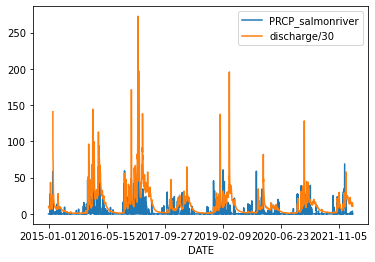

In [53]:
fig, ax = plt.subplots(1,1)
df.plot(x='DATE', y=['PRCP_'+precip_station,'discharge/30'], ax=ax)
#ax.plot(df['DATE'], df['PRCP'])

In [54]:
above_freezing_df = df[df['TMIN_happycamp']>0]

<AxesSubplot:xlabel='DATE'>

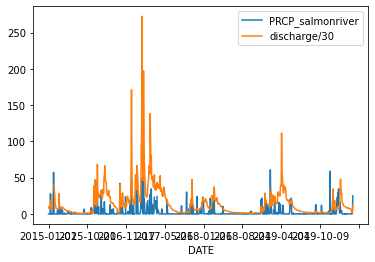

In [55]:
fig, ax = plt.subplots(1,1)
above_freezing_df.plot(x='DATE', y=['PRCP_'+ precip_station,'discharge/30'], ax=ax)
#ax.plot(df['DATE'], df['PRCP'])

In [56]:
summer_df = df[(df['month']>6) & (df['month']<12)]

<AxesSubplot:xlabel='DATE'>

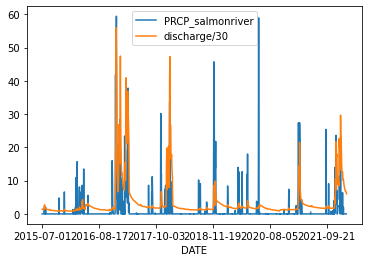

In [57]:
fig, ax = plt.subplots(1,1)
summer_df.plot(x='DATE', y=['PRCP_'+precip_station,'discharge/30'], ax=ax)
#ax.plot(df['DATE'], df['PRCP'])

In [58]:
summer_2016_df = summer_df[summer_df['year']==2016]

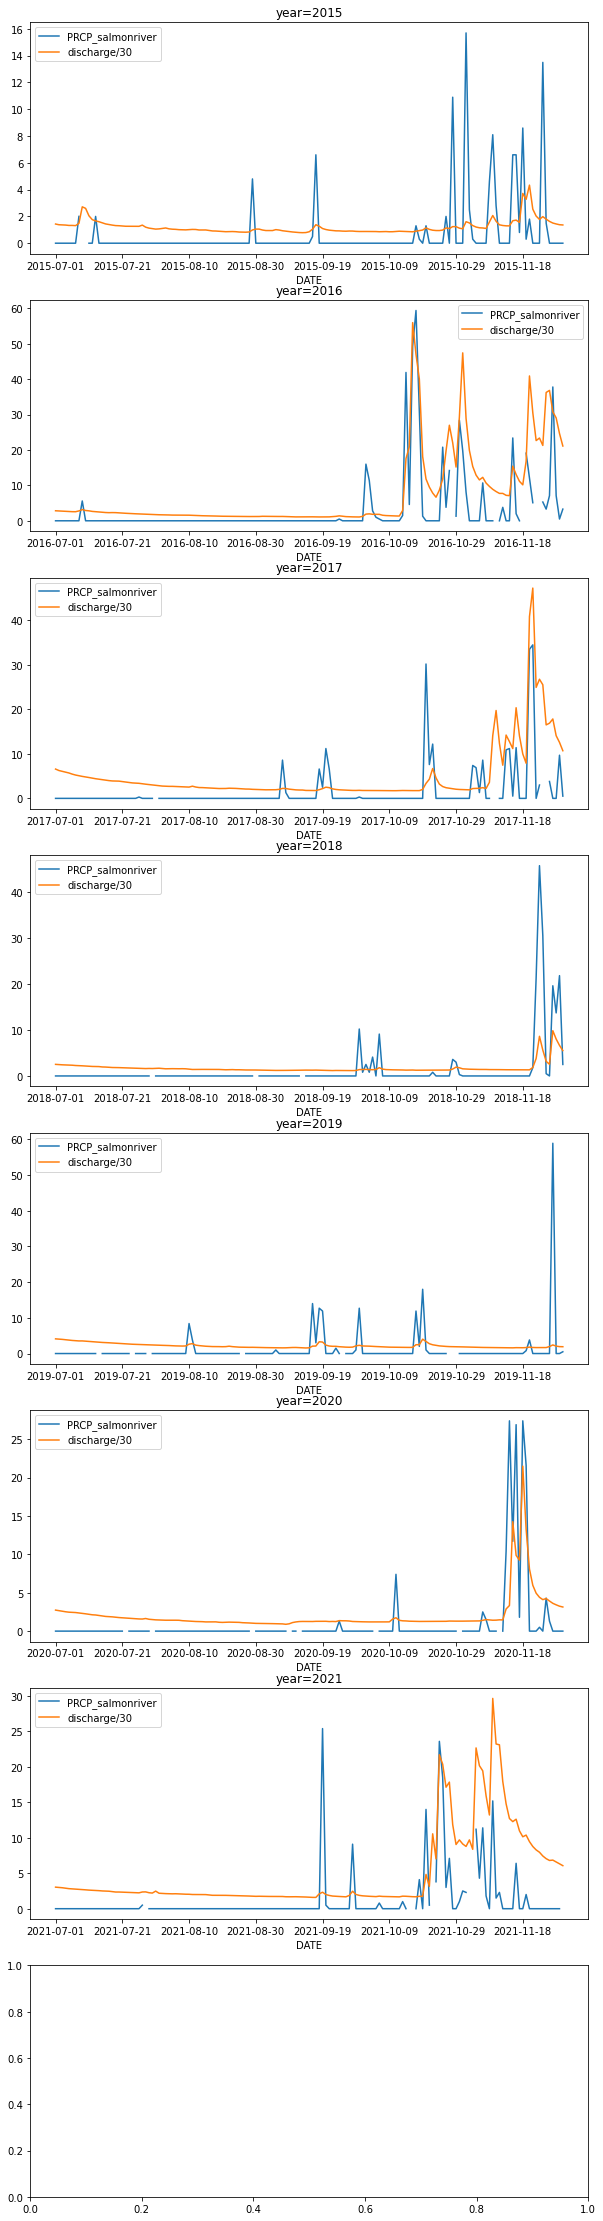

In [59]:
fig, ax = plt.subplots(8,1, figsize=(10,40))
for i in range(7):
    year=2015+i
    summer_df_year = summer_df[summer_df['year']==year]
    summer_df_year.plot(x='DATE', y=['PRCP_'+ precip_station,'discharge/30'], ax=ax[i])
    ax[i].set_title('year=' + str(year))
#ax.plot(df['DATE'], df['PRCP'])

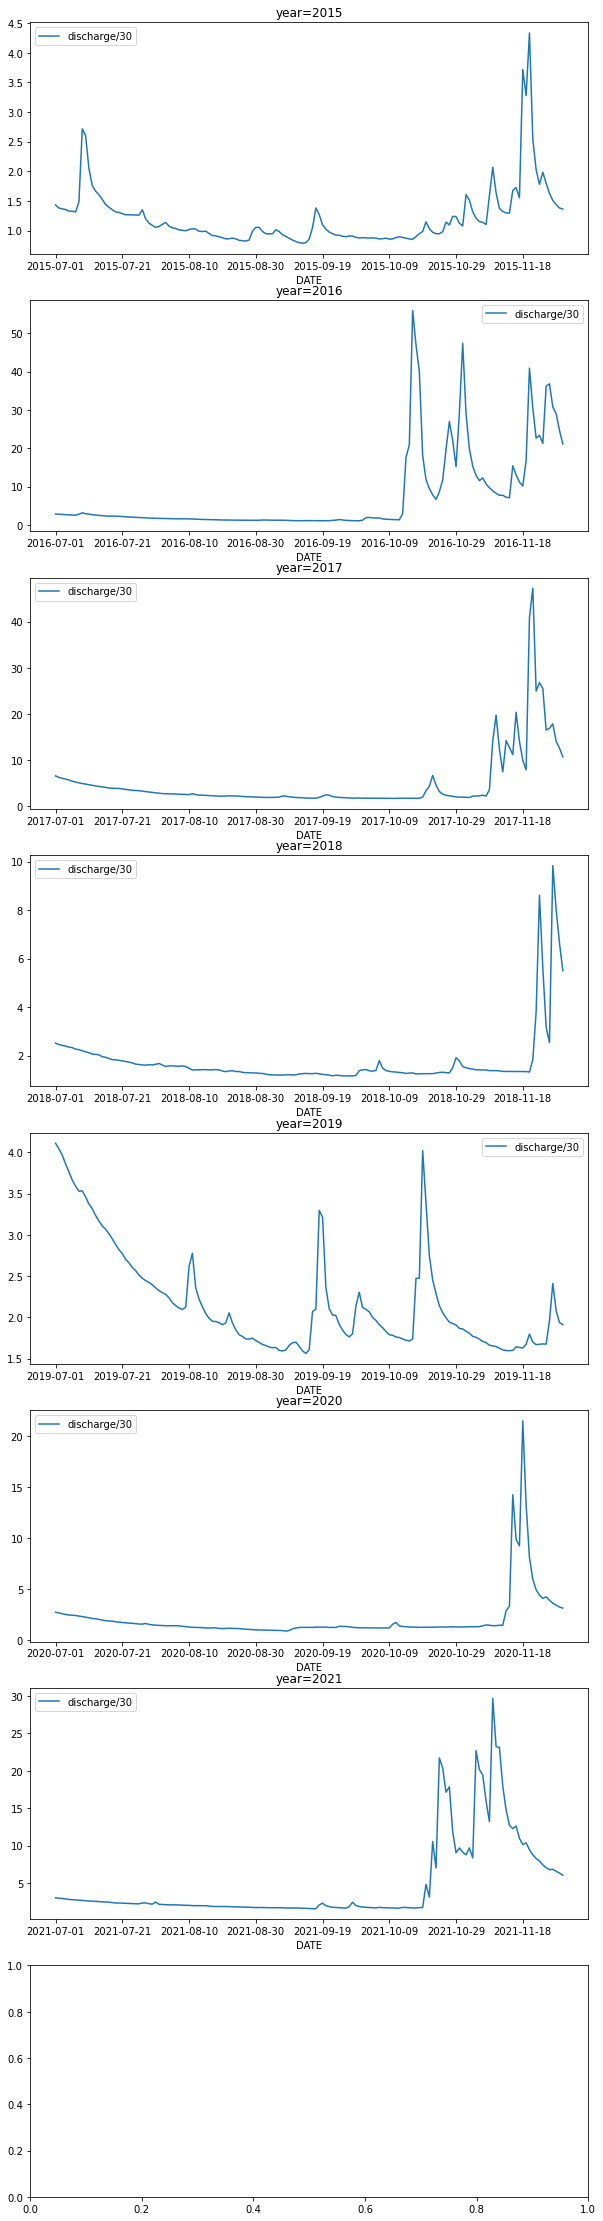

In [60]:
fig, ax = plt.subplots(8,1, figsize=(10,40))
for i in range(7):
    year=2015+i
    summer_df_year = summer_df[summer_df['year']==year]
    summer_df_year.plot(x='DATE', y=['discharge/30'], ax=ax[i])
    ax[i].set_title('year=' + str(year))
#ax.plot(df['DATE'], df['PRCP'])

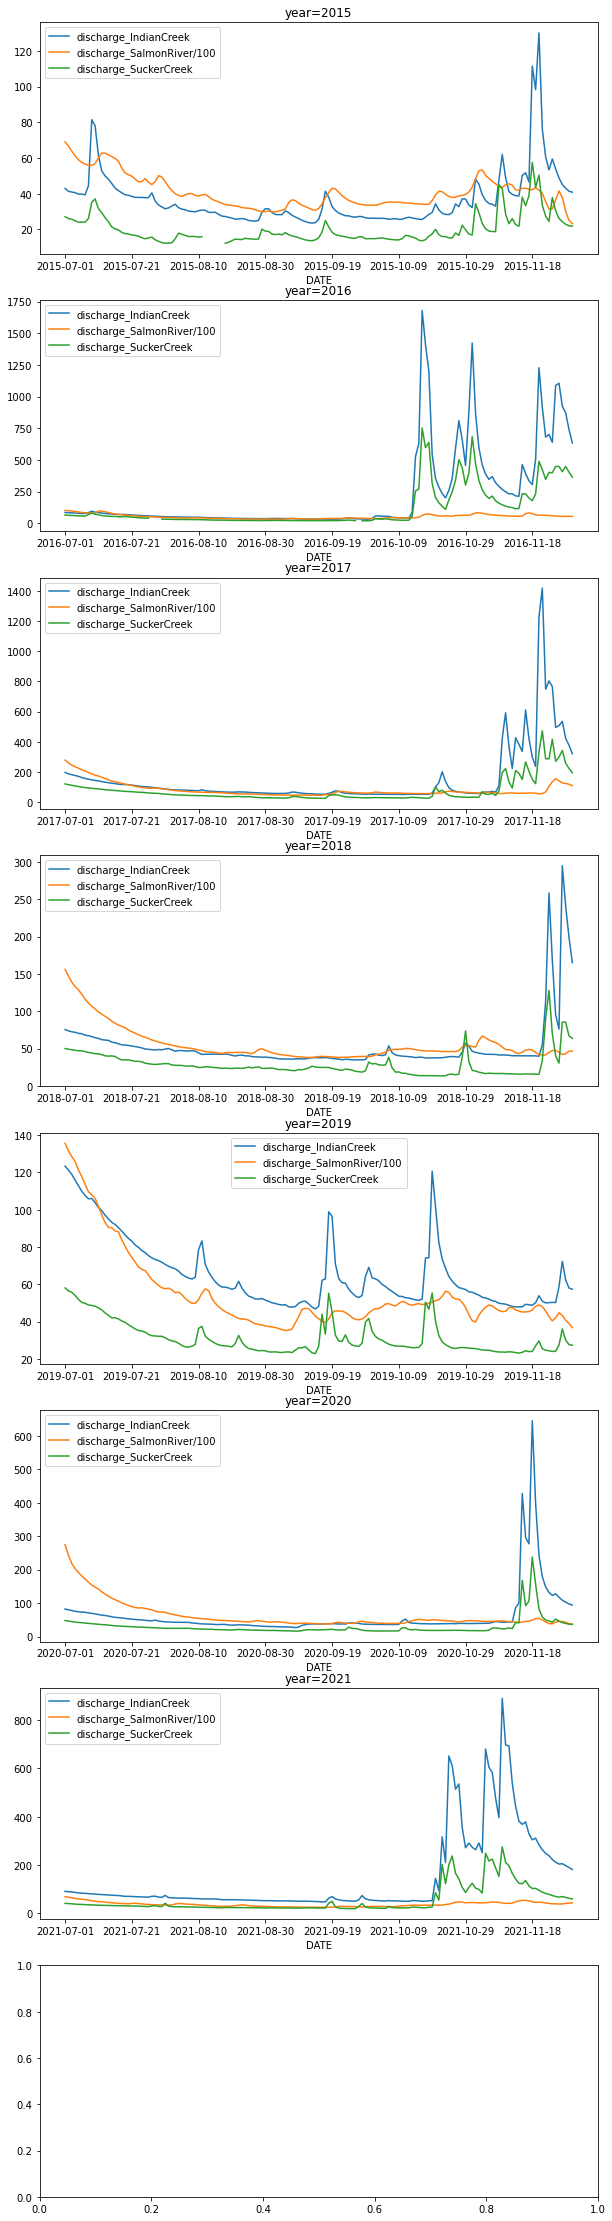

In [61]:
fig, ax = plt.subplots(8,1, figsize=(10,40))
for i in range(7):
    year=2015+i
    summer_df_year = summer_df[summer_df['year']==year]
    summer_df_year.plot(x='DATE', y=['discharge_IndianCreek', 'discharge_SalmonRiver/100','discharge_SuckerCreek'], ax=ax[i])
    ax[i].set_title('year=' + str(year))
#ax.plot(df['DATE'], df['PRCP'])

In [62]:
summer_df.corr()

,PRCP_happycamp,TMAX_happycamp,TMIN_happycamp,TOBS_happycamp,PRCP_orleans,PRCP_salmonriver,PRCP_cavejunction,discharge_IndianCreek,gage_ht_IndianCreek,discharge_IndianCreek_daily_change,...,gage_ht_SalmonRiver,discharge_SalmonRiver_daily_change,discharge_SuckerCreek,gage_ht_SuckerCreek,discharge_SuckerCreek_daily_change,year,month,day,discharge/30,discharge_SalmonRiver/100
PRCP_happycamp,1.000000,-0.383416,-0.034638,-0.035334,NaN,0.756871,0.825833,0.691605,0.588308,0.110883,...,NaN,0.254259,0.642476,0.580295,0.217154,-1.049066e-01,1.820006e-01,9.688512e-02,0.691605,-0.030195
TMAX_happycamp,-0.383416,1.000000,0.721922,0.704394,NaN,-0.408658,-0.442851,-0.472892,-0.517544,0.144711,...,NaN,-0.303090,-0.469216,-0.502768,0.095654,1.166206e-01,-8.345798e-01,6.964339e-03,-0.472892,0.135999
TMIN_happycamp,-0.034638,0.721922,1.000000,0.971402,NaN,-0.106069,-0.092962,-0.097779,-0.113998,0.047525,...,NaN,-0.205433,-0.085686,-0.099829,0.031318,1.363222e-01,-8.090161e-01,1.146524e-02,-0.097779,0.262447
TOBS_happycamp,-0.035334,0.704394,0.971402,1.000000,NaN,-0.093114,-0.090220,-0.088052,-0.121691,0.008900,...,NaN,-0.195437,-0.084621,-0.112264,0.005245,2.144134e-01,-7.877477e-01,-6.954628e-02,-0.088052,0.283812
PRCP_orleans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRCP_salmonriver,0.756871,-0.408658,-0.106069,-0.093114,NaN,1.000000,0.816027,0.576646,0.502475,0.356112,...,0.349545,0.182725,0.551740,0.506455,0.370359,-4.008684e-02,2.573227e-01,9.501521e-02,0.576646,-0.026775
PRCP_cavejunction,0.825833,-0.442851,-0.092962,-0.090220,NaN,0.816027,1.000000,0.636609,0.571748,0.535373,...,0.317805,0.199603,0.610072,0.576849,0.556999,-8.480768e-02,2.550103e-01,8.979985e-02,0.636609,-0.090040
discharge_IndianCreek,0.691605,-0.472892,-0.097779,-0.088052,NaN,0.576646,0.636609,1.000000,0.911562,0.247889,...,0.308688,0.167938,0.965387,0.887516,0.265628,-3.194339e-02,3.196040e-01,9.890162e-02,1.000000,0.146525
gage_ht_IndianCreek,0.588308,-0.517544,-0.113998,-0.121691,NaN,0.502475,0.571748,0.911562,1.000000,0.130726,...,0.389525,0.120809,0.916069,0.967130,0.145579,-2.795180e-01,3.020628e-01,8.685519e-02,0.911562,0.161674
discharge_IndianCreek_daily_change,0.110883,0.144711,0.047525,0.008900,NaN,0.356112,0.535373,0.247889,0.130726,1.000000,...,-0.146597,-0.011072,0.174434,0.118692,0.909681,-5.539994e-03,1.182804e-02,1.548946e-02,0.247889,-0.043119


In [63]:
summer_df['discharge_IndianCreek'].diff(periods=1)

181          NaN
182    -1.580208
183    -0.410417
184    -0.338542
185    -0.812500
          ...   
2521   -7.614583
2522    1.520833
2523   -7.812500
2524   -8.302083
2525   -7.416667
Name: discharge_IndianCreek, Length: 1071, dtype: float64

In [64]:
i=0
summer_df['discharge_IndianCreek_daily_change'].corr(summer_df['PRCP_salmonriver'])
#sm.tsa.stattools.ccf(summer_df['discharge_IndianCreek_daily_change'], summer_df['PRCP_salmonriver'], adjusted=False)

0.35611200230465195

In [65]:
for offset in range(20):
    print(summer_df.shift(offset)['discharge_IndianCreek_daily_change'].corr(summer_df['PRCP_salmonriver']))
#a=summer_df['discharge_IndianCreek_daily_change'][offset:]
#a.values

0.35611200230465195
0.3032559267319386
0.15870291248145907
0.07185341374009069
0.07514693759220749
0.034436158296764476
-0.01966015352460664
0.05935696514550741
-0.019202709992553756
0.002723524800235964
-0.012851779148995131
0.02826662897734529
0.0028692945220069586
-0.005818952257702419
0.012192464359808527
0.07386299110697359
0.07978073872713337
-0.009753581249845513
-0.04707466742313414
0.0019753441758005486


In [66]:
summers_before=summer_df[summer_df.year<2020]
summers_after=summer_df[summer_df.year>2020]


In [67]:
for offset in range(20):   
    print(summers_before.shift(offset)['discharge_IndianCreek_daily_change'].corr(summers_before['PRCP_salmonriver']))


0.354751766269514
0.30642836210979435
0.17959183798629635
0.05617187054561642
0.07793179333335229
0.016111211330195194
-0.015333986470272173
0.0595155577759286
-0.0204384810148345
0.01436339358351219
-0.020820499338315316
0.027885164645223004
0.0028987993758538325
-0.022959203409519194
0.01999937710386329
0.08152713585418826
0.08076386336426791
-0.010593433304813122
-0.06408535954334199
0.00925095014710136


In [68]:
for offset in range(20):   
    print(summers_after.shift(offset)['discharge_IndianCreek_daily_change'].corr(summers_after['PRCP_salmonriver']))


0.5181637542973851
0.12174866482931772
0.1723940482023734
0.09883140826027681
-0.04550427573387725
0.20230040136133406
-0.06907715332567804
0.07519128777418213
-0.039192213515298585
-0.1012864039101431
0.02279449828071206
0.04162525936962509
-0.0011893960687715877
0.14250269621324624
-0.04836102023065091
0.06480975982029008
0.1354875073920514
-0.012364432799734081
0.07174447471013516
-0.06422590687053026


In [69]:
for offset in range(20):   
    print(summers_before.shift(offset)['discharge_SalmonRiver_daily_change'].corr(summers_before['PRCP_salmonriver']))


0.18957707538965055
0.1659878061557127
0.08612391073502083
0.047157631812409395
0.053648438182565324
0.04273167135221412
0.0405785370835664
0.031134923913128755
0.04621371120851434
0.05295161367910087
0.07151256260604433
0.09758713745227583
0.05615087677213633
0.05031949616008094
0.07011916751477214
0.04656854478391869
0.02788359820045342
0.01503406487566153
0.022046144409476054
0.031540454159045876


In [70]:
for offset in range(20):   
    print(summers_after.shift(offset)['discharge_SalmonRiver_daily_change'].corr(summers_after['PRCP_salmonriver']))


0.20841300578257657
0.18888000354214007
0.13198472878866413
0.11762865223837103
0.0946711710224636
0.08199647330568807
0.08421104683371543
0.07482803550713646
0.07054100556667865
0.13905147356820624
0.18279679155494474
0.14241098279355963
0.16384478556882076
0.16637983440695814
0.21527490261978835
0.20243062436208353
0.1544213908176363
0.1431892171759149
0.03304326047913267
0.011966190286053573


In [71]:
result = sm.ols(formula="discharge_IndianCreek_daily_change ~ PRCP_salmonriver", data=summer_df).fit()

In [72]:
result.params


Intercept          -6.750553
PRCP_salmonriver    5.251846
dtype: float64

In [73]:
def lag_reg(df, offset_max,dependent_var, independent_var):
    reg_string = dependent_var +' ~ ' + independent_var + '_0'
    lag_df = df[[dependent_var]]
    lag_df[independent_var+'_' + str(0)]=df.shift(0)[[independent_var]].values
    for offset in range(1,offset_max):
        lag_df[independent_var+'_' + str(offset)]=df.shift(-offset)[[independent_var]].values
        reg_string += ' + '+independent_var +'_' + str(offset)
    result = sm.ols(formula=reg_string, data=lag_df).fit()
    return result.params, result.rsquared

In [74]:
lag_reg(summer_df, 6, 'discharge_IndianCreek_daily_change','PRCP_salmonriver')

/tmp/ipykernel_131/1050527928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag_df[independent_var+'_' + str(0)]=df.shift(0)[[independent_var]].values
/tmp/ipykernel_131/1050527928.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag_df[independent_var+'_' + str(offset)]=df.shift(-offset)[[independent_var]].values


(Intercept            -8.094952
 PRCP_salmonriver_0    2.581547
 PRCP_salmonriver_1    2.349512
 PRCP_salmonriver_2    1.289906
 PRCP_salmonriver_3   -0.535125
 PRCP_salmonriver_4   -0.020682
 PRCP_salmonriver_5   -0.341922
 dtype: float64,
 0.13111185115169666)

In [75]:
corr_coef_df = pd.DataFrame(range(6))
for river in ["SalmonRiver","IndianCreek","SuckerCreek"]:
    #print('discharge_' + river+'_daily_change')
    params, rsquared = lag_reg(summers_before, 6, 'discharge_' + river+'_daily_change','PRCP_salmonriver')
    #print(params)
    #print(rsquared)
    corr_coef_df[river + 'before']=numpy.array(params[1:])
    #plt.plot(range(6),params[1:])
    params, rsquared = lag_reg(summers_after, 6, 'discharge_' + river+'_daily_change','PRCP_salmonriver')
    #print(params)
    #print(rsquared)
    #plt.plot(range(6),params[1:])
    corr_coef_df[river + 'after']=numpy.array(params[1:])


/tmp/ipykernel_131/1050527928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag_df[independent_var+'_' + str(0)]=df.shift(0)[[independent_var]].values
/tmp/ipykernel_131/1050527928.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag_df[independent_var+'_' + str(offset)]=df.shift(-offset)[[independent_var]].values


In [76]:
corr_coef_df.set_index(0,inplace=True)

In [77]:
corr_coef_df

,SalmonRiverbefore,SalmonRiverafter,IndianCreekbefore,IndianCreekafter,SuckerCreekbefore,SuckerCreekafter
0,,,,,,
0,11.662161,5.506862,2.431941,9.737499,1.417804,2.965855
1,6.724858,3.447740,2.243228,0.268228,0.777622,-0.850375
2,-0.366706,2.949894,2.107673,-0.628461,0.624975,-0.122769
3,-2.021645,6.060526,-0.957511,-0.733798,-0.227723,-0.227424
4,-0.502262,5.345904,0.206095,-3.676584,0.141015,-1.263715
5,1.090265,3.073373,-0.501961,4.345181,-0.324341,1.756456


<AxesSubplot:xlabel='0'>

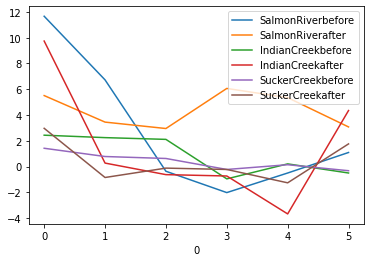

In [78]:
corr_coef_df.plot()

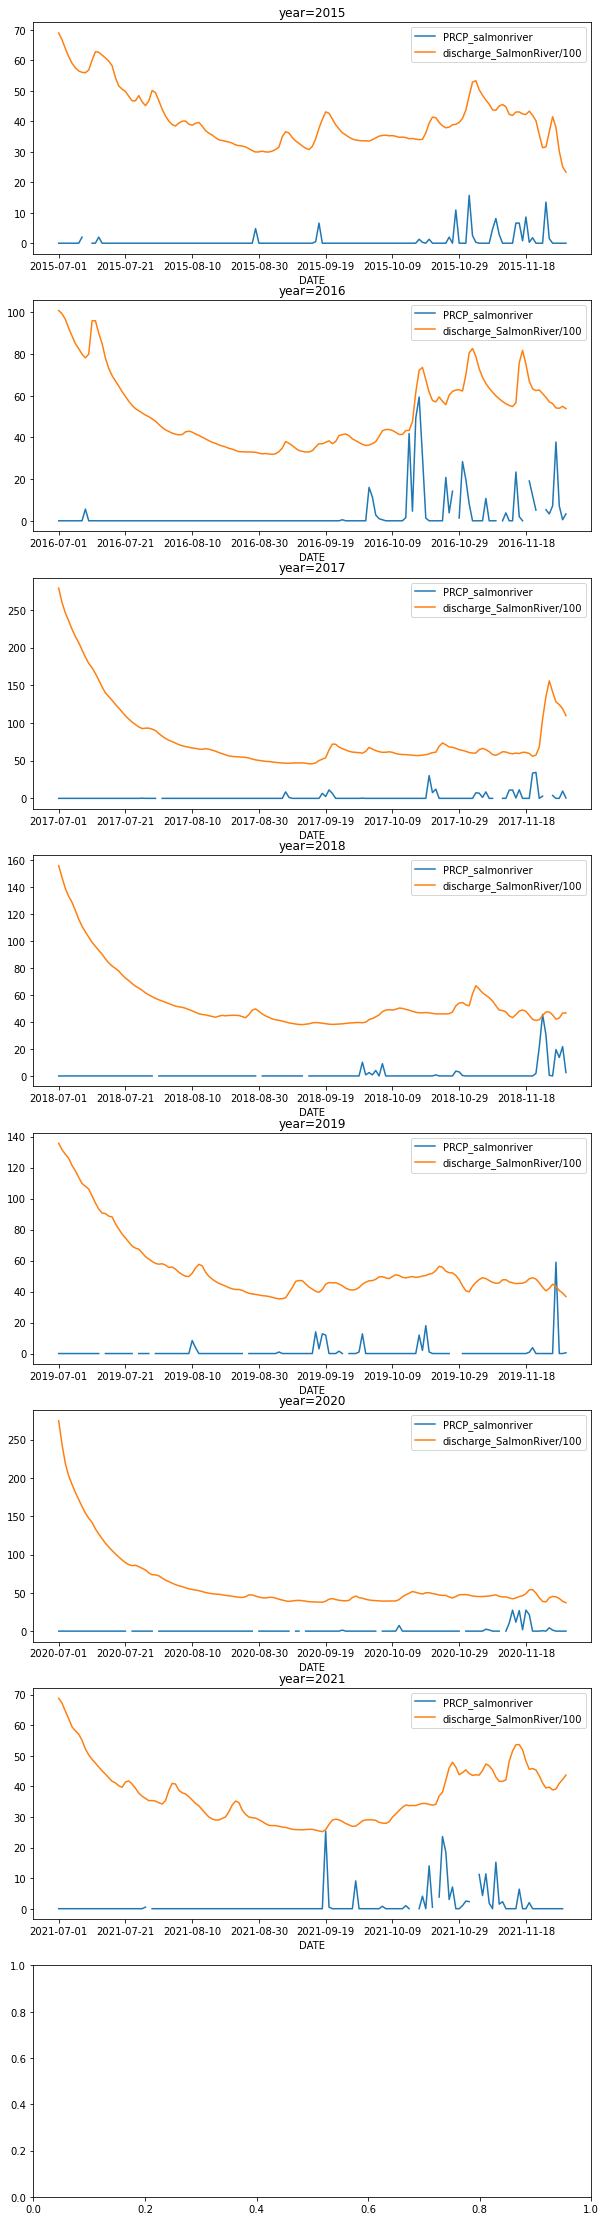

In [79]:
fig, ax = plt.subplots(8,1, figsize=(10,40))
summer_df
for i in range(7):
    year=2015+i
    summer_df_year = summer_df[summer_df['year']==year]
    summer_df_year.plot(x='DATE', y=['PRCP_salmonriver','discharge_SalmonRiver/100'], ax=ax[i])
    ax[i].set_title('year=' + str(year))
#ax.plot(df['DATE'], df['PRCP'])

Intercept                            -8.545748
discharge_SalmonRiver_daily_change    0.001687
PRCP_salmonriver_0                    2.412265
PRCP_salmonriver_1                    2.231883
PRCP_salmonriver_2                    2.108292
PRCP_salmonriver_3                   -0.954100
PRCP_salmonriver_4                    0.206943
PRCP_salmonriver_5                   -0.503801
dtype: float64
0.14973709929865797


/tmp/ipykernel_131/551975948.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag_df[independent_var+'_' + str(0)]=df.shift(0)[[independent_var]].values
/tmp/ipykernel_131/551975948.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag_df[independent_var+'_' + str(offset)]=df.shift(-offset)[[independent_var]].values


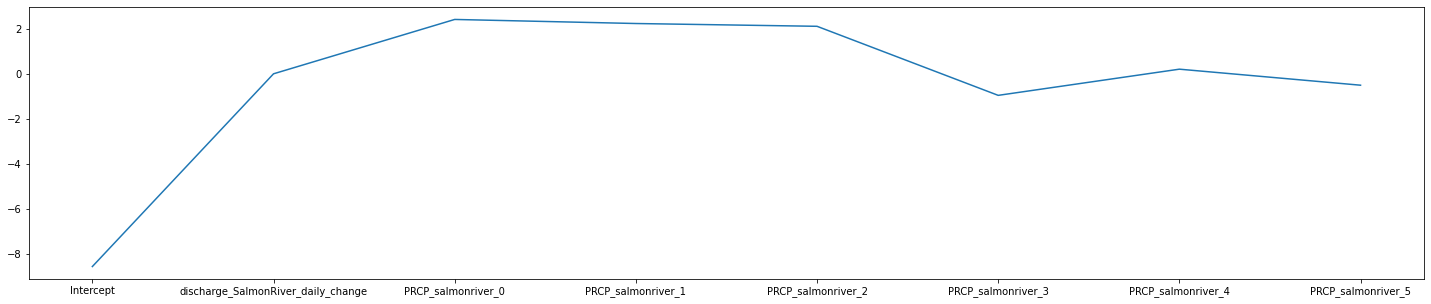

In [80]:
df=summers_before
offset_max=6
river="IndianCreek"
dependent_var='discharge_' + river+'_daily_change'
independent_var='PRCP_salmonriver'
reg_string = dependent_var +' ~ discharge_SalmonRiver_daily_change + ' + independent_var + '_0'
lag_df = df[[dependent_var, 'discharge_SalmonRiver_daily_change']]
lag_df[independent_var+'_' + str(0)]=df.shift(0)[[independent_var]].values
for offset in range(1,offset_max):
    lag_df[independent_var+'_' + str(offset)]=df.shift(-offset)[[independent_var]].values
    reg_string += ' + '+independent_var +'_' + str(offset)
result = sm.ols(formula=reg_string, data=lag_df).fit()
print(result.params)
print(result.rsquared)
fig,ax=plt.subplots(1,1, figsize=(25,5))
ax.plot(result.params)

In [81]:
df=summers_after
offset_max=6
river="IndianCreek"
dependent_var='discharge_' + river+'_daily_change'
independent_var='PRCP_salmonriver'
reg_string = dependent_var +' ~ discharge_SalmonRiver_daily_change + ' + independent_var + '_0'
lag_df = df[[dependent_var, 'discharge_SalmonRiver_daily_change']]
lag_df[independent_var+'_' + str(0)]=df.shift(0)[[independent_var]].values
for offset in range(1,offset_max):
    lag_df[independent_var+'_' + str(offset)]=df.shift(-offset)[[independent_var]].values
    reg_string += ' + '+independent_var +'_' + str(offset)
result = sm.ols(formula=reg_string, data=lag_df).fit()
print(result.params)
print(result.rsquared)

Intercept                            -16.053246
discharge_SalmonRiver_daily_change    -0.137186
PRCP_salmonriver_0                    10.492963
PRCP_salmonriver_1                     0.741210
PRCP_salmonriver_2                    -0.223777
PRCP_salmonriver_3                     0.097621
PRCP_salmonriver_4                    -2.943201
PRCP_salmonriver_5                     4.766805
dtype: float64
0.3764294202348526


/tmp/ipykernel_131/1129516749.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag_df[independent_var+'_' + str(0)]=df.shift(0)[[independent_var]].values
/tmp/ipykernel_131/1129516749.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag_df[independent_var+'_' + str(offset)]=df.shift(-offset)[[independent_var]].values


/tmp/ipykernel_131/4221423542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_df_year['discharge_IndianCreek_daily_change/10']= summer_df['discharge_IndianCreek_daily_change']/10
/tmp/ipykernel_131/4221423542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_df_year['discharge_IndianCreek_daily_change/10']= summer_df['discharge_IndianCreek_daily_change']/10
/tmp/ipykernel_131/4221423542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

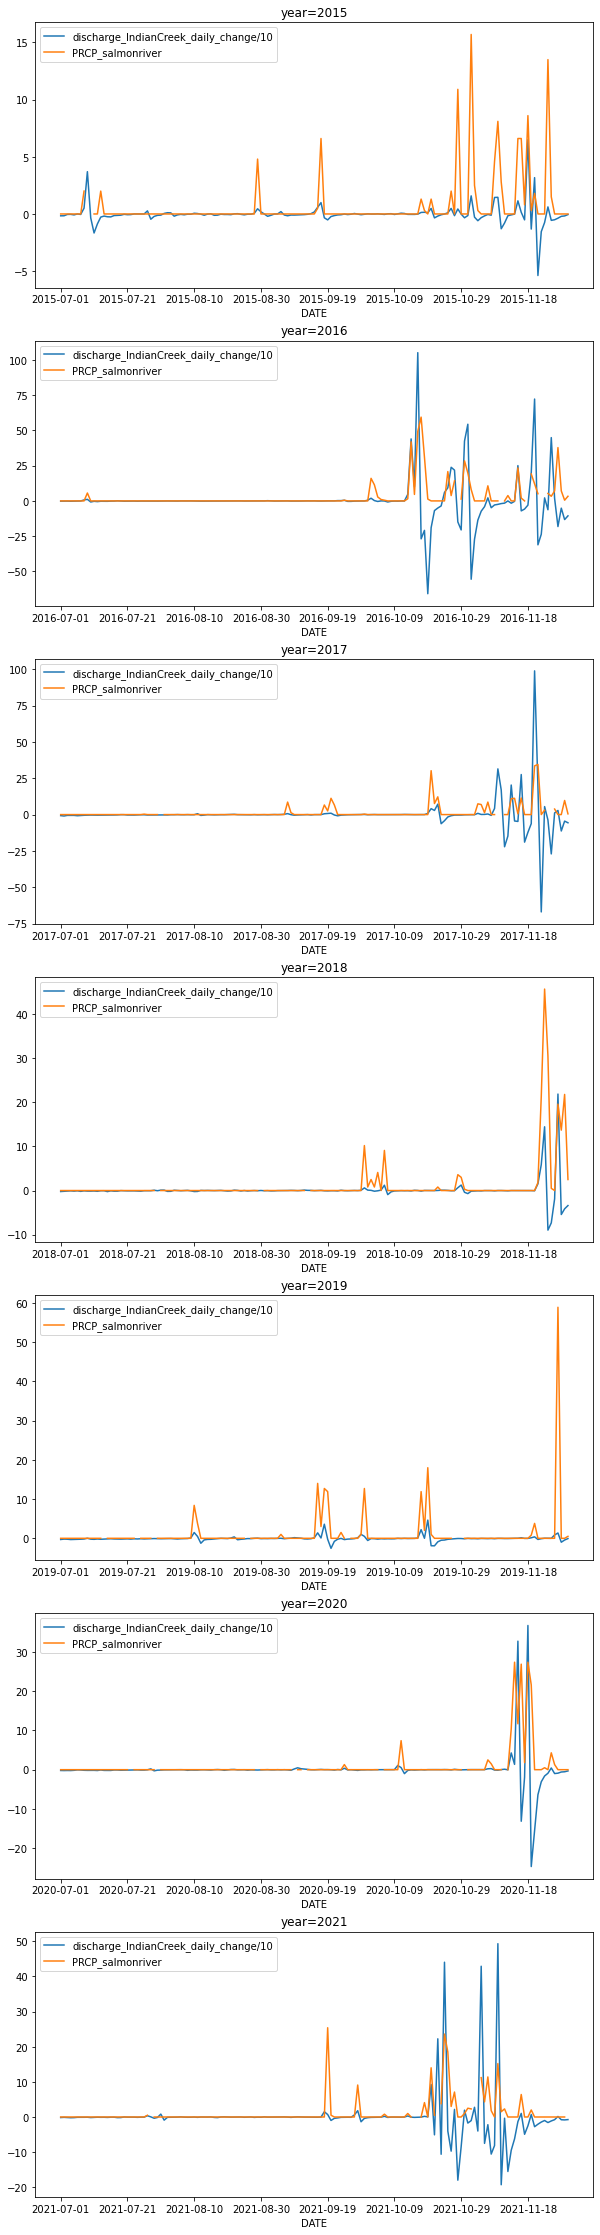

In [82]:
fig, ax = plt.subplots(7,1, figsize=(10,40))
for i in range(7):
    year=2015+i
    summer_df_year = summer_df[summer_df['year']==year]
    summer_df_year['discharge_IndianCreek_daily_change/10']= summer_df['discharge_IndianCreek_daily_change']/10
    summer_df_year.plot(x='DATE', y=['discharge_IndianCreek_daily_change/10','PRCP_salmonriver'], ax=ax[i])
    ax[i].set_title('year=' + str(year))
#ax.plot(df['DATE'], df['PRCP'])

/tmp/ipykernel_131/4226028104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_df_year['discharge_SalmonRiver_daily_change/100']= summer_df['discharge_SalmonRiver_daily_change']/100
/tmp/ipykernel_131/4226028104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_df_year['discharge_SalmonRiver_daily_change/100']= summer_df['discharge_SalmonRiver_daily_change']/100
/tmp/ipykernel_131/4226028104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


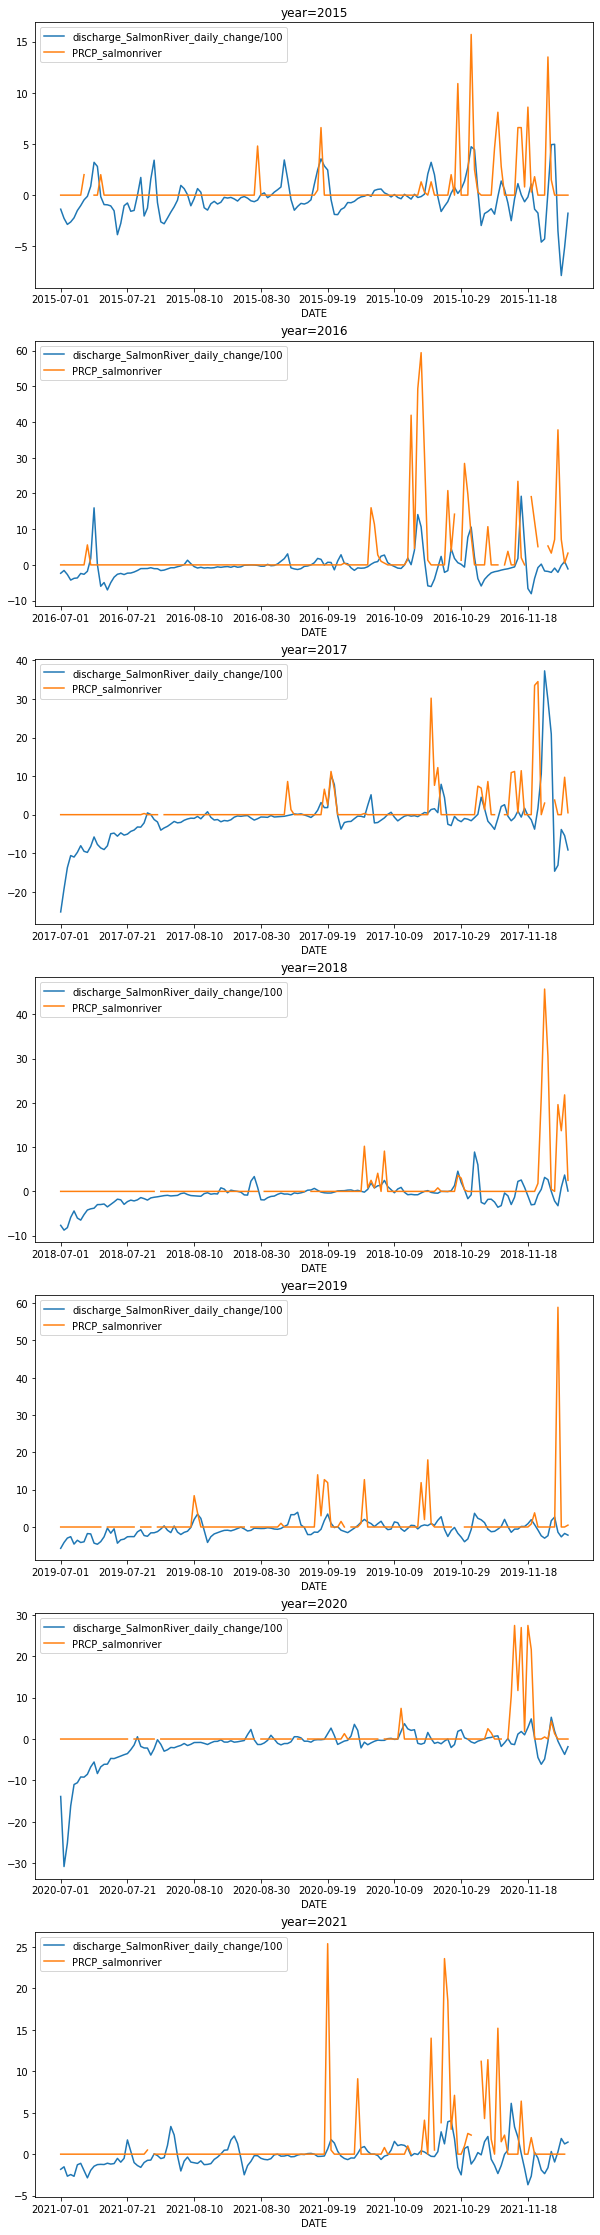

In [83]:
fig, ax = plt.subplots(7,1, figsize=(10,40))
for i in range(7):
    year=2015+i
    summer_df_year = summer_df[summer_df['year']==year]
    summer_df_year['discharge_SalmonRiver_daily_change/100']= summer_df['discharge_SalmonRiver_daily_change']/100
    summer_df_year.plot(x='DATE', y=['discharge_SalmonRiver_daily_change/100','PRCP_salmonriver'], ax=ax[i])
    ax[i].set_title('year=' + str(year))
#ax.plot(df['DATE'], df['PRCP'])

<AxesSubplot:xlabel='PRCP_happycamp', ylabel='PRCP_salmonriver'>

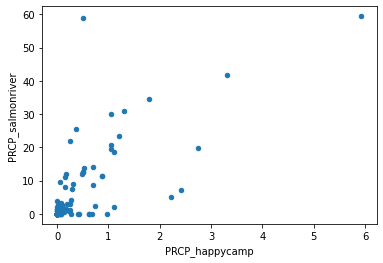

In [84]:
summer_df.plot.scatter(x='PRCP_happycamp', y='PRCP_salmonriver')